<h2><font color="#004D7F" size=6>Tratamiento de datos para MD (Parte I)</font></h2>



<h1><font color="#004D7F" size=5>Evaluación de Algoritmos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Ing. Miguel Carlos Pita</font><br>
<font color="#004D7F" size=3>Modelizado de Minería de Datos</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías y CSV](#section11)
* [2. Métricas de clasificación](#section2)
    * [2.1. Accuracy](#section21)
    * [2.2. Kappa](#section22)
    * [2.3. Área bajo la curva ROC](#section23)
    * [2.4. Matriz de confusión](#section24)
    * [2.5. Precisión](#section25)
        * [2.5.1. Ejemplos](#section251)
    * [2.6. Recall](#section26)
        * [2.6.1. Ejemplos](#section261)
    * [2.7. F-Measure(F-1)](#section27)
        * [2.7.1. Ejemplos](#section271)
    * [2.8. Reporte de clasificación](#section28)
* [3. Métricas de regresión](#section3)
    * [3.1. Error medio absoluto](#section31)
    * [3.2. Error cuadrático medio](#section32)
    * [3.3. $R^2$](#section33)

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

El rendimiento de un modelo refleja la diferencia entre las predicciones de este para un conjunto de entradas X, y los valores Y esperados.
* Regresión: El error cuadratico medio, que se formula como:

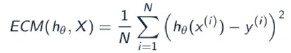

* Clasificación: La tasa de acierto/error:

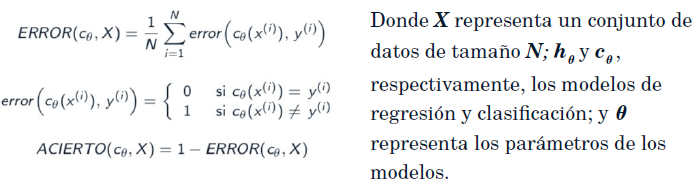

**ERROR en LiR (Regresion Lineal - Problema de Regresión) y LoR (Regresion Logística - Problema de Clasificación)**

Devuelven la configuracion de parámetros óptima, es decir, aquella que minimiza el error o coste con respecto a los datos utilizados en el aprendizaje.
El error del modelo aumenta (puede no ocurrir en algunos casos) en la prediccion de nuevos casos.

**Error predictivo**

* LiR

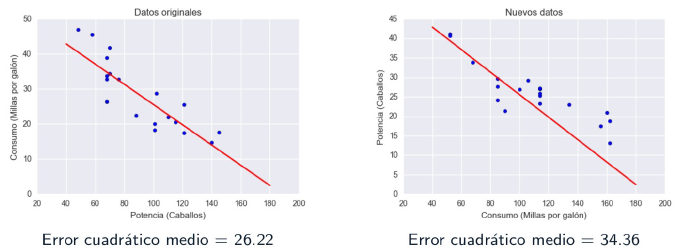

* LoR

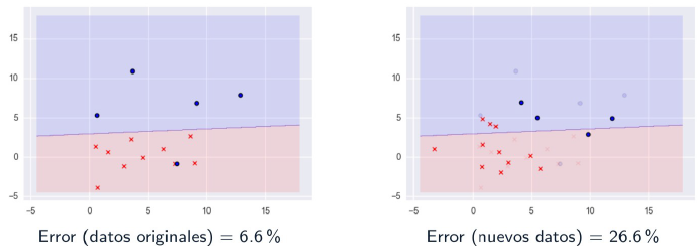

El conjunto de datos utilizado para aprender el modelo se denomina conjunto de entrenamiento.

En general, el rendimiento de un modelo sobre nuevos datos es peor que sobre el conjunto de entrenamiento.

**Rendimiento del modelo**: Corresponde al que presenta en la prediccion de nuevos casos.

La evaluación del modelo ha de hacerse sobre datos no hayan sido utilizados en ninguna fase del proceso entrenamiento

Las métricas que elige para evaluar sus algoritmos de Machine Learning son muy importantes. La elección de métricas influye en cómo se mide y compara el rendimiento de los algoritmos de Machine Learning. Influyen en cómo se valora la importancia de las diferentes características en los resultados y su elección final de qué algoritmo elegir. Veremos cómo seleccionar y utilizar diferentes métricas de rendimiento de Machine Learning en Python con scikit-learn.

En todas las pruebas se evalúan los mismos algoritmos, LoR para clasificación y LiR para problemas de regresión. Se utiliza una prueba de validación cruzada 10-folds para demostrar la mayoría de las métricas, porque este es el escenario más probable que utilizará al emplear diferentes métricas de evaluación de algoritmos. Para algunas pruebas se utiliza train test split.

**Importante:** Una vez que has evaluado los modelos utilizando técnicas como la validación cruzada, es una buena práctica entrenar el modelo seleccionado con todo el conjunto de datos disponibles. Esto se debe a que al entrenar con todos los datos, el modelo tiene más información para aprender y, por lo tanto, puede hacer mejores predicciones cuando se despliega en producción o se utiliza en nuevas predicciones. Durante el proceso de validación, el modelo se entrena solo con subconjuntos del conjunto de datos (k-folds), pero al final, para obtener un modelo más robusto, se entrena con todo el conjunto de datos.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
En estas pruebas la función [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) es utilizada para informar el rendimiento en la mayoría de las pruebas.
</div> 

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Puede obtener más información sobre las métricas de rendimiento del algoritmo de Machine Learning compatibles en la página [Model evaluation: quantifying the quality of predictions](http://scikit-learn.org/stable/modules/model_evaluation.html).
</div> 

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías y CSV</font>

Se muestran varias métricas de evaluación de algoritmos diferentes para problemas de Machine Learning de clasificación y regresión.
* **Clasificación**: se usará el conjunto de datos de Pima Indians Diabetes. Este es un problema de clasificación binaria donde todas las características de entrada son numéricas.

In [1]:
import pandas as pd
import numpy as np

ruta_clas = 'data/pima-indians-diabetes.data.csv'

nombres_clas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df_clas = pd.read_csv(ruta_clas, names=nombres_clas)

array_clas = df_clas.values
X_clas = array_clas[:, 0:8] # Separamos del conjunto de datos la matriz X (variables independientes)
y_clas = array_clas[:, 8] # Separamos del conjunto de datos el vector y (variable dependientes)

In [5]:
df_clas

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
array_clas

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [9]:
X_clas

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
y_clas

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

### Vemos si la clase está desbalanceada

In [13]:
# Primera forma de observar el desbalance

df_clas.groupby('class').size()

class
0    500
1    268
dtype: int64

In [15]:
# Segunda forma de observar el desbalance

df_clas['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

* **Regresión**: se usará el conjunto de datos Boston House Price. Este es un problema de regresión donde todas las características de entrada también son numéricas.

In [1]:
import numpy as np
import pandas as pd

ruta_reg='data/housing.csv'

nombres_reg = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_reg = pd.read_csv(ruta_reg, sep=r'\s+', names=nombres_reg)

array_reg = df_reg.values
X_reg = array_reg[:,:13]
y_reg = array_reg[:,13]

In [3]:
df_reg

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
array_reg

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [7]:
X_reg

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
y_reg

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

El Boston Housing Dataset es un conjunto de datos clásico utilizado en problemas de regresión. Fue recopilado por el Instituto de Tecnología de Massachusetts (MIT) en los años 70 y contiene información sobre los precios de las viviendas en diferentes suburbios de Boston. El objetivo del conjunto de datos es predecir el valor medio de las casas en función de diversas características.

#### **Características del conjunto de datos:**
Este conjunto de datos contiene 506 observaciones y 13 características (columnas), además de una columna objetivo (el precio medio de la vivienda). 

**Tamaño del dataset:** 506 filas y 14 columnas.

**Tipo de problema:** Este es un problema de regresión donde el objetivo es predecir el precio medio de las viviendas (MEDV) en función de las otras características.

#### **Descripciones de cada una de las columnas:**

**CRIM:** Tasa de criminalidad per cápita por ciudad.

**ZN:** Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.

**INDUS:** Proporción de acres de negocios no minoristas por ciudad.

**CHAS:** Variable ficticia (dummy) que indica si la propiedad está cerca del río Charles (1 si está cerca del río, 0 si no).

**NOX:** Concentración de óxidos de nitrógeno (medido en partes por 10 millones).

**RM:** Número medio de habitaciones por vivienda.

**AGE:** Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

**DIS:** Distancias ponderadas a cinco centros de empleo en Boston.

**RAD:** Índice de accesibilidad a autopistas radiales.

**TAX:** Tasa de impuestos a la propiedad por cada $10,000.

**PTRATIO:** Relación alumno-maestro por ciudad.

**B:** 1000(𝐵𝑘−0.63)^2, donde Bk es la proporción de personas de ascendencia afroamericana en la ciudad.

**LSTAT:** Porcentaje de la población de bajo estatus socioeconómico.

**MEDV:** Valor medio de las viviendas ocupadas por sus propietarios (en miles de dólares). Esta es la variable objetivo.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Métricas de clasificación (Logistic Regression - LoR)</font>

Los problemas de clasificación son quizás el tipo más común de problema de Machine Learning y, como tal, tenemos diferentes métricas que se pueden utilizar para evaluar las predicciones de estos problemas. Revisaremos cómo usar las siguientes métricas:
* Accuracy.
* Cohen's Kappa.
* Área bajo la curva ROC. 
* Matriz de confusión.
* Informe de clasificación.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Accuracy (Porcentaje de Acierto)</font>

El accuracy de clasificación es el número de predicciones correctas realizadas como una relación de todas las predicciones realizadas. Es el porcentaje de instancias correctamente clasificadas de todas las instancias. Muy útil para la clasificación binaria pero no para clasificacion multiclase.

Puede ver que se informa la relación. Esto se puede convertir en un porcentaje multiplicando el valor en 100, dando una puntuación de precisión de aproximadamente el 77% de accuracy.

Esta métrica no es tan buena prediciendo cuando tengo las clases desbalanceadas.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
En la nueva versión de sklearn establece que si se pone `random_state` hay que barajar los datos obligatoriamente cuando se utiliza `KFold()`. Por tanto, se debe poner `shuffle = true`.
</div>

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(max_iter=1000)

scoring='accuracy'

resultado = cross_val_score(model, X_clas, y_clas, cv=kfold, scoring=scoring)
print(f"Accuracy: {resultado.mean()*100:.2f}% ({resultado.std()*100:.2f})")

Accuracy: 77.22% (4.97)


In [25]:
# 500 instancias de clase 0 --> utilizando accuracy se aciertan algunos
# 500 instancias de clase 1 --> utilizando accuracy se aciertan algunos
# CLASES BALANCEADAS --> Hay que utilizar la métrica Accuracy

# 1000 instancias de clase 0 --> imaginando que con accuracy se aciertan TODOS
# 100 instancias de clase 1 --> imaginando que con accuracy NO se acierta NADA
# Porcentaje de Acierto: +/- 90% (es engañoso)
# Tengo un DESBALANCE DE CLASES --> Hay que utilizar la métrica Cohen's Kappa

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Aunque por defecto nos otorga esta métrica puede llamarse también a la clase [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy\20metric#sklearn.metrics.accuracy_score).
</div>

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Kappa</font>

Kappa o Cohen's Kappa se utiliza en problemas de clasificación y es una medida más útil para usar en problemas que tienen un desequilibrio en las clases (por ejemplo, una división del 70% al 30% para las clases 0 y 1, respectivamente, y puede alcanzar el 70% de precisión al predecir que todas las instancias son para la clase 0 pero ninguna para la clase 1).

En este ejemplo podemos observar como el modelo no era tan preciso como se podía observar en la métrica Accuracy. Al ser un dataset descompensado respecto al atributo clase y penalizando mediante está métrica podemos ver como el porcentaje disminuye considerablemente.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score

X_train, X_test, y_train, y_test = train_test_split(X_clas, y_clas, test_size=0.33, random_state=7)
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
predicciones = model.predict(X_test)

cohen_score = cohen_kappa_score(y_test, predicciones)
print(f"Cohen score: {cohen_score*100.0:.2f}%")

Cohen score: 52.42%


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de Scikit-Learn sobre la clase [`cohen_kappa_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html?highlight=kappa#sklearn.metrics.cohen_kappa_score).
</div>

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Área bajo la curva ROC</font>

El área bajo la curva ROC _(AUC: Area Under the Curve)_ es una métrica de rendimiento para problemas de clasificación binaria. El AUC representa la capacidad de un modelo para discriminar entre clases positivas y negativas. Un área de 1.0 representa un modelo que hizo todas las predicciones perfectamente. Un área de 0.5 representa un modelo tan bueno como aleatorio. ROC puede desglosarse en sensibilidad y especificidad. Un problema de clasificación binaria es realmente una compensación entre sensibilidad y especificidad.

* La __sensibilidad__ es la verdadera tasa positiva también llamada recuerdo. Es el número de instancias de la clase positiva (primera) que realmente predijo correctamente.
* La __especificidad__ también se denomina tasa negativa verdadera. Es el número de instancias de la clase negativa (segunda) que en realidad se predijo correctamente.

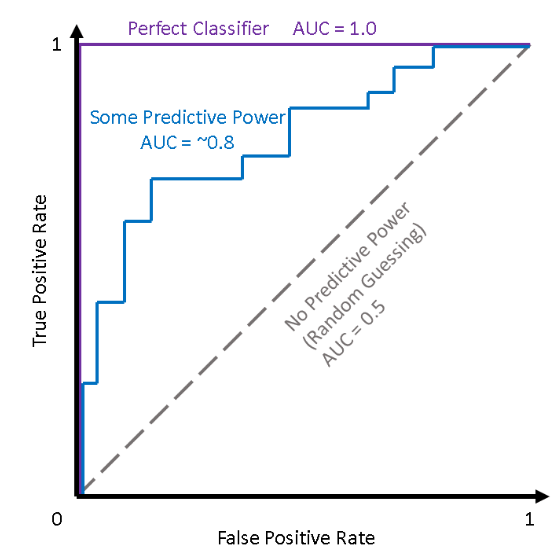

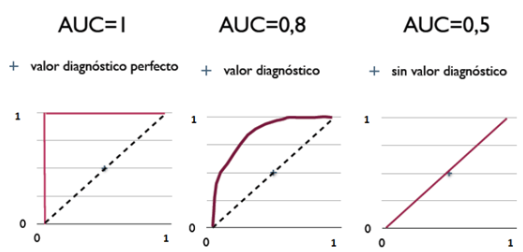

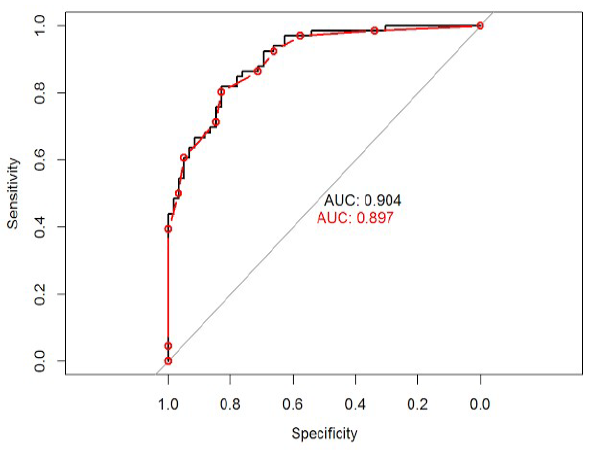

El siguiente ejemplo proporciona una demostración de cálculo de AUC.

Puede ver que el AUC es relativamente cercano a 1 y mayor que 0.5, lo que sugiere cierta habilidad en las predicciones. De todas maneras, al igual que el "accuracy", esta métrica no es tan buena prediciendo cuando tengo las clases desbalanceadas.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
En la nueva versión de sklearn establece que si se pone `random_state` hay que barajar los datos obligatoriamente cuando se utiliza `KFold()`. Por tanto, se debe poner `shuffle = true`.
</div>

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(max_iter=1000)

scoring='roc_auc'

resultado = cross_val_score(model, X_clas, y_clas, cv=kfold, scoring=scoring)
print(f"AUC: {resultado.mean()} ({resultado.std()})")

AUC: 0.8293778534986265 (0.046985351744622116)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de Scikit-Learn sobre la clase [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score).
</div>

<a id="section24"></a>
## <font color="#004D7F"> 2.4. Matriz de confusión</font>

La matriz de confusión es una presentación práctica de la precisión de un modelo con dos o más clases. La tabla presenta predicciones en el eje x y resultados de precisión en el eje y. Las celdas de la tabla son el número de predicciones realizadas por un algoritmo.

Para los problemas de clasificación desequilibrada (desbalanceada), la clase mayoritaria se denomina típicamente resultado negativo ("sin cambio" o "resultado negativo de la prueba"), y la clase minoritaria se denomina típicamente resultado positivo ("cambio" o "resultado positivo de la prueba").

La matriz de confusión proporciona más información no solo sobre el rendimiento de un modelo predictivo, sino también sobre qué clases se predicen correctamente, cuáles incorrectamente y qué tipo de errores se están cometiendo.

Aunque la matriz se imprime sin encabezados, puede ver que la mayoría de las predicciones caen en la línea diagonal de la matriz (que son predicciones correctas). La matriz de confusión más simple es para un problema de clasificación de dos clases, con clases negativas (clase 0) y positivas (clase 1). En este tipo de matriz de confusión, cada celda de la tabla tiene un nombre específico y bien entendido, resumido de la siguiente manera:

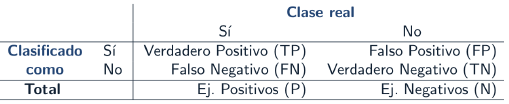

**IMPORTANTE: Al utilizar sklearn, las matrices de confusión que obtendremos nosotros serán de este tipo:**

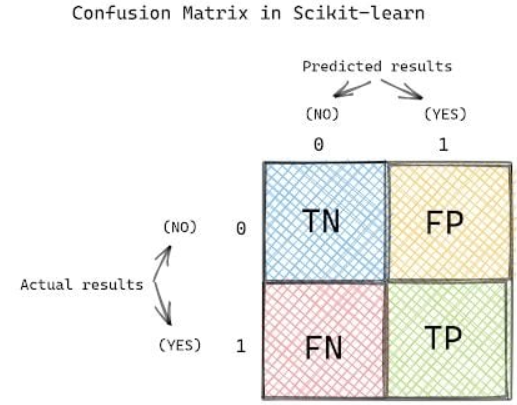

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_clas, y_clas, test_size=0.33, random_state=7)
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
predicciones = model.predict(X_test)

matriz = confusion_matrix(y_test, predicciones)
print(matriz)

[[142  20]
 [ 34  58]]


En este caso la clase 0 la ha predicho correctamente 142 veces y 20 veces de manera incorrecta, mientras que la clase 1 la ha predicho correctamente 58 veces y 34 veces de manera incorrecta. Esto habría que verlo mejor en relación de los porcentajes.

#### Para observar los porcentajes de las clases:

In [19]:
print(f"Verdaderos Positivos:{matriz[1,1]/(matriz[1,0]+matriz[1,1])*100:.2f}%")
print(f"Falso Negativos:{matriz[0,1]/(matriz[1,0]+matriz[1,1])*100:.2f}%")
print(f"Verdaderos Negativo:{matriz[0,0]/(matriz[0,0]+matriz[0,1])*100:.2f}%")
print(f"Falso Positivos:{matriz[0,1]/(matriz[0,0]+matriz[0,1])*100:.2f}%")

Verdaderos Positivos:63.04%
Falso Negativos:21.74%
Verdaderos Negativo:87.65%
Falso Positivos:12.35%


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de Scikit-Learn sobre la clase [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).
</div>

<a id="section25"></a>
## <font color="#004D7F"> 2.5. Precisión</font>

Como medida de rendimiento, el Accuracy es inapropiado para problemas de clasificación desequilibrados (clase desbalanceada). Una alternativa para problemas de clasificación es el uso de Precisión que cuantifica el número de predicciones de clase positivas que realmente pertenecen a la clase positiva.

Las métricas de Precision y Recall se definen en términos de las celdas en la matriz de confusión, específicamente términos como verdaderos positivos y falsos negativos:

La Precisión se calcula como la relación de ejemplos positivos predichos correctamente dividida por el número total de ejemplos positivos que se predijeron. 

$$Precision = \frac{TruePositives}{(TruePositives + FalsePositives)}$$

El resultado es un valor entre 0.0 para no precisión y 1.0 para precisión total o perfecta.

<a id="section251"></a>
### <font color="#004D7F"> 2.5.1. Ejemplos</font>

#### Ejemplo 1: Clasificación Binaria

Un modelo hace predicciones y predice 120 ejemplos como pertenecientes a la clase minoritaria, 90 de los cuales son correctos y 30 de los cuales son incorrectos. La precisión para este modelo se calcula como:

$$Precision = \frac{TruePositives}{(TruePositives + FalsePositives)} = \frac{90}{(90 + 30)} = \frac{90}{120} = 0,75$$

El resultado es una precisión de 0,75, que es un valor razonable pero no sobresaliente.

#### Ejemplo 2: Clasificación Binaria

Considere el mismo conjunto de datos, donde un modelo predice 50 ejemplos que pertenecen a la clase minoritaria, 45 de los cuales son verdaderos positivos y cinco de los cuales son falsos positivos. Podemos calcular la precisión para este modelo de la siguiente manera:

$$Precision = \frac{TruePositives}{(TruePositives + FalsePositives)} = \frac{45}{(45 + 5)} = \frac{45}{50} = 0,90$$

En este caso, aunque el modelo predijo muchos menos ejemplos como pertenecientes a la clase minoritaria, la proporción de ejemplos positivos correctos es mucho mejor.

#### Ejemplo 3: Clasificación Multiclase
Un modelo hace predicciones y predice 70 ejemplos para la primera clase minoritaria, donde 50 son correctos y 20 incorrectos. Predice 150 para la segunda clase con 99 correctos y 51 incorrectos. La precisión se puede calcular para este modelo de la siguiente manera:

$$Precision = \frac{TP1 + TP2}{((TP1 + TP2) + (FP1 + FP2)} = \frac{50+99}{((50+99) + (20+51))} = \frac{149}{220} = 0,677$$

Podemos ver que el cálculo métrico de Precision se escala a medida que aumentamos el número de clases minoritarias.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
La Precision puede ser calculada usando la función Sklearn [`precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html).
</div>

<a id="section26"></a>
## <font color="#004D7F"> 2.6. Recall</font>

Ya mencionamos que como medida de rendimiento, el Accuracy es inapropiado para problemas de clasificación desequilibrados (clase desbalanceada). Una alternativa para problemas de clasificación es el uso de Recall que cuantifica el número de predicciones positivas correctas hechas de todas las predicciones positivas que podrían haberse realizado. 

A diferencia de Precision, que solo comenta las predicciones positivas correctas de todas las predicciones positivas, Recall  proporciona una indicación de predicciones positivas perdidas.

En un problema de clasificación desequilibrada con dos clases, Recall se calcula como el número de verdaderos positivos dividido por el número total de verdaderos positivos y falsos negativos.

$$Recall = \frac{TruePositives}{(TruePositives + FalseNegatives)}$$

El resultado es un valor entre 0.0 para no precisión y 1.0 para precisión total o perfecta.

<a id="section261"></a>
### <font color="#004D7F"> 2.6.1. Ejemplos</font>

#### Ejemplo 1: Clasificación Binaria

Un modelo hace predicciones y predice 90 de las predicciones de clase positivas correctamente y 10 incorrectamente. Podemos calcular Recall para este modelo de la siguiente manera:

$$Recall = \frac{TruePositives}{(TruePositives + FalseNegatives)} = \frac{90}{(90 + 10)} = \frac{90}{100} = 0,9$$

Tiene buen Recall.

#### Ejemplo 2: Clasificación Multiclase
Un modelo predice 77 ejemplos correctamente y 23 incorrectamente para la clase 1, y 95 correctamente y cinco incorrectamente para la clase 2. Podemos calcular el Recall para este modelo de la siguiente manera:

$$Precision = \frac{TP1 + TP2}{((TP1 + TP2) + (FN1 + FN2)} = \frac{77+95}{((77+95) + (23+5))} = \frac{172}{200} = 0,86$$

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
El Recall puede ser calculado usando la función Sklearn [`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html).
</div>

<a id="section27"></a>
## <font color="#004D7F"> 2.7. F-Measure (F-1)</font>

Una alternativa al uso de Precisión y Recall es utilizar F-Measure o F-1, el cual proporciona una puntuación que equilibra Precision y Recall en un solo número. F-1 proporciona una forma de combinar Precisión y Recall en una sola medida que captura ambas propiedades.

$$F-1 = \frac{(2 \times Precision \times Recall)}{(Precision + Recall)}$$

El resultado es un valor entre 0.0 para no precisión y 1.0 para precisión total o perfecta.

<a id="section271"></a>
### <font color="#004D7F"> 2.7.1. Ejemplos</font>

#### Ejemplo 1: Clasificación Binaria

Considere un modelo que predice 150 ejemplos para la clase positiva, de los cuales 95 son correctos (verdaderos positivos), lo que significa que se perdieron cinco (falsos negativos) y 55 son incorrectos (falsos positivos).

$$Precision = \frac{95}{(95 + 55)} = 0,633$$

$$Recall = \frac{95}{(95 + 5)} = 0,95$$

Podemos ver que tenemos un excelente Recall pero una mala Precision. Veamos el F-Measure:

$$F-1 = \frac{(2 \times 0,63 \times 0,95)}{(0,95 + 0,63)} = 0,759$$

**Esta es una métrica que cuando las clases están desbalanceadas nos viene perfectamente a la hora de evaluar nuestro modelo.**

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
F-Measure (F-1) puede ser calculado usando la función Sklearn [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).
</div>

<a id="section28"></a>
## <font color="#004D7F"> 2.8. Reporte de clasificación</font>

La librería scikit-learn proporciona un informe de conveniencia cuando se trabaja en problemas de clasificación para darle una idea rápida de la precisión de un modelo utilizando una serie de medidas. La función `classification_report()` muestra _precisión, recall, F1-score_ y el soporte para cada clase. 

En el ejemplo podemos ver que tenemos unas buenas métricas para la clase 0 pero, sin embargo, para la clase 1 no tenemos un buen desempeño.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_clas, y_clas, test_size=0.33, random_state=7)
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
predicciones = model.predict(X_test)

reporte = classification_report(y_test, predicciones)
print(reporte)

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       162
         1.0       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



**Support**:

Se refiere al número de ocurrencias reales de cada clase en el conjunto de datos. En este contexto:

* Para la clase 0.0, hay 162 instancias reales.
* Para la clase 1.0, hay 92 instancias reales.

Este valor se utiliza para entender la distribución de las clases en el conjunto de datos, lo cual puede afectar las métricas de rendimiento. Recordemos que este conjunto de datos consta de 768 instancias en total y se está utilizando una división de los datos en conjunto de entrenamiento y prueba usando train_test_split, como el valor de test_size es 0.33, esto significa que el 33% de los datos son reservados para pruebas y el 67% se usan para entrenamiento (de 768 instancias, el 33% son aproximadamente 254 instancias).

**Accuracy (Precisión global):**

* Definición: Es la métrica más simple y se refiere al porcentaje de predicciones correctas sobre el total de predicciones. En este caso, el modelo obtuvo una precisión del 79%, lo que significa que el 79% de las predicciones fueron correctas.
* Interpretación: El modelo está clasificando correctamente el 79% de las instancias en el conjunto de prueba.

**Macro Average (Promedio macro):**

* Definición: El promedio macro calcula el promedio de métricas (precisión, recall y F1-score) para cada clase, tratándolas a todas por igual, sin importar cuántas instancias de cada clase haya en el conjunto de datos. Este promedio no tiene en cuenta el desbalance entre las clases.
* Interpretación:
    - Precisión macro: Es del 78%, lo que indica que, en promedio, el modelo clasifica correctamente el 78% de los ejemplos de cada clase.
    - Recall macro: Es del 75%, lo que significa que, en promedio, el modelo identifica correctamente el 75% de las instancias positivas en cada clase.
    - F1-score macro: Es del 76%, que es el balance entre la precisión y el recall para todas las clases.

**Weighted Average (Promedio ponderado):**

* Definición: El promedio ponderado calcula las métricas para cada clase y luego las pondera según el número de instancias que haya en cada clase. Esto significa que las clases con más instancias tienen más peso en el cálculo.
* Interpretación:
    - Precisión ponderada: Es del 78%, lo que refleja que, cuando se tiene en cuenta el desbalance entre clases, el modelo sigue teniendo un buen rendimiento general.
    - Recall ponderado: Es del 79%, lo que indica que el modelo está capturando bien las instancias de las clases con más ejemplos.
    - F1-score ponderado: Es del 78%, lo que refleja el equilibrio entre precisión y recall cuando se considera el número de instancias de cada clase.

Para el caso del Accuracy ponderado (Precisión ponderada):

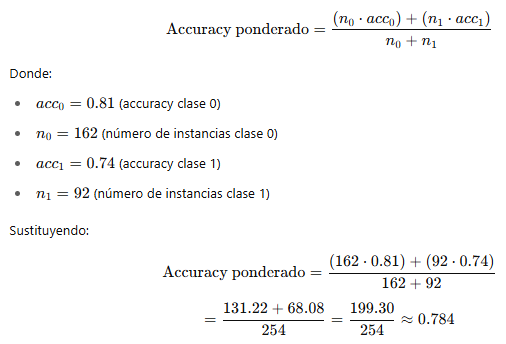

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de Scikit-Learn sobre la clase [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report).
</div>

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Métricas de regresión (Linear Regression - LiR)</font>

Revisaremos 3 de las métricas más comunes para evaluar predicciones sobre problemas de regresión de Machine Learning:
* Error absoluto medio.
* Error cuadrático medio.
* $R^2$

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Error medio absoluto</font>

El error absoluto medio _(MAE)_ es la suma de las diferencias absolutas entre las predicciones y los valores reales, dividido el número total de observaciones. Da una idea de cuán erróneas fueron las predicciones. La medida da una idea de la magnitud del error, pero no tiene idea de la dirección (por ejemplo, sobre o por debajo de la predicción).

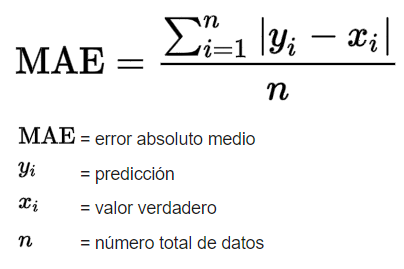

Un valor de 0 indica que no hay error o predicciones perfectas. 

In [11]:
# Estamos utilizando el 33% de los datos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.33, random_state=7)
model = LinearRegression()

model.fit(X_train, y_train)
predicciones = model.predict(X_test)

MAE = mean_absolute_error(y_test, predicciones)
print(MAE)

3.3286948545850708


Esta métrica se invierte por la función `cross_val_score`, y de esta forma que los valores mayores indiquen un mejor rendimiento.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
En la nueva versión de sklearn establece que si se pone `random_state` hay que barajar los datos obligatoriamente cuando se utiliza `KFold()`. Por tanto, se debe poner `shuffle = true`.
</div>

Cuando utilizamos cross_val_score, obtenemos el Negative MAE:

In [13]:
# Validación Cruzada Neg MAE - Estamos usando todos los datos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()

scoring='neg_mean_absolute_error'

resultado = cross_val_score(model, X_reg, y_reg, cv=kfold, scoring=scoring)
print(f"Neg MAE: {resultado.mean()} ({resultado.std()})")

Neg MAE: -3.387007745115892 (0.6666977115119628)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de Scikit-Learn sobre la clase [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html?highlight=mean%20absolute%20error#sklearn.metrics.mean_absolute_error).
</div>

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Error cuadrático medio</font>

El error cuadrático medio _(MSE)_ es muy similar al error absoluto medio en el sentido de que proporciona una idea general de la magnitud del error. 

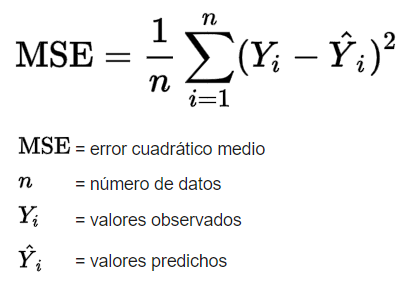

Tomar la raíz cuadrada del error cuadrático medio convierte las unidades de nuevo a las unidades originales de la variable de salida y puede ser significativo para la descripción y presentación. Esto se llama el error cuadrático medio de raíz _(RMSE)_, por ejemplo, si estás prediciendo el precio de casas, el MSE estará en dólares cuadrados, lo cual no tiene un significado intuitivo.

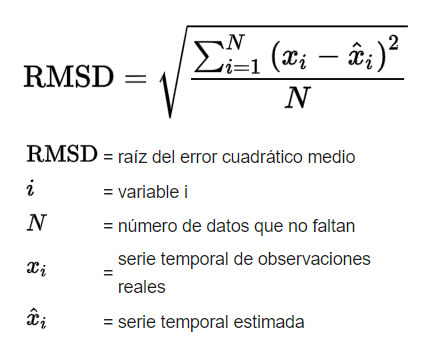

In [15]:
# Estamos utilizando el 33% de los datos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.33, random_state=7)
model = LinearRegression()

model.fit(X_train, y_train)
predicciones = model.predict(X_test)

MSE = mean_squared_error(y_test, predicciones)
print(MSE)

25.322307423586217


In [17]:
import numpy as np

RMSE = np.sqrt(MSE)
print(RMSE)

5.032127524575089


**Sabremos si el valor que nos da es alto o no cuando lo comparamos con otro algoritmo.**

Esta métrica también se invierte por la función `cross_val_score` para que los resultados estén aumentando, y de esta forma que los valores mayores indiquen un mejor rendimiento.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
En la nueva versión de sklearn establece que si se pone `random_state` hay que barajar los datos obligatoriamente cuando se utiliza `KFold()`. Por tanto, se debe poner `shuffle = true`.
</div>

Cuando utilizamos cross_val_score, obtenemos el Negative MSE:

In [19]:
# Validación Cruzada Neg MSE - Estamos usando todos los datos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()

scoring='neg_mean_squared_error'

resultado = cross_val_score(model, X_reg, y_reg, cv=kfold, scoring=scoring)
print(f"Neg MSE: {resultado.mean()} ({resultado.std()})")

Neg MSE: -23.74650181131339 (11.143430110698056)


In [21]:
import numpy as np

RMSE = np.sqrt(abs(resultado.mean()))
print(RMSE)

print(np.sqrt(resultado.std()))

4.873038252601081
3.338177663141681


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de Scikit-Learn sobre la clase [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean%20squared%20error#sklearn.metrics.mean_squared_error).
</div>

<a id="section33"></a>
## <font color="#004D7F"> 3.3. $R^2$</font>

La métrica $R^2$ proporciona una indicación del ajuste de un conjunto de predicciones a los valores reales. En la literatura estadística, esta medida se llama coeficiente de determinación. Este es un valor entre 0 (si no tiene ajuste) y 1 (ajuste perfecto). Las predicciones se ajustan mal a los valores reales con un valor más cercano a cero y menor que 0.5.

In [23]:
# Estamos utilizando el 33% de los datos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.33, random_state=7)
model = LinearRegression()

model.fit(X_train, y_train)
predicciones = model.predict(X_test)

R2 = r2_score(y_test, predicciones)
print(R2)

0.666308960657257


Ante este resultado vemos que el modelo no tiene un buen ajuste (para ello debería haber tenido más de 0.75). Es un modelo un poco aleatorio a la hora de hacer predicciones.

Si lo calculamos con la función `cross_val_score`:

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
En la nueva versión de sklearn establece que si se pone `random_state` hay que barajar los datos obligatoriamente cuando se utiliza `KFold()`. Por tanto, se debe poner `shuffle = true`.
</div>

In [25]:
# R2 con cross_val_score - Estamos usando todos los datos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()

scoring='r2'

resultado = cross_val_score(model, X_reg, y_reg, cv=kfold, scoring=scoring)
print(f"R2: {resultado.mean()} ({resultado.std()})")

R2: 0.7181683241114102 (0.09866585171842528)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de Scikit-Learn sobre la clase [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score).
</div>

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>